# Load data

In [1]:
import pandas as pd
import numpy as np
import sys
import os
sys.path.extend(['../', '../../'])
from cb_model import ConvertibleBondPricer
from TW_cb_backtest import TaiwanCBStrategy
import matplotlib.pyplot as plt

In [2]:
path_26107 = r'C:\Users\User\Desktop\CB-pricing\CB data\CB_26107\cb_26107_daily.parquet'
path_26107_property = r'C:\Users\User\Desktop\CB-pricing\CB data\CB_26107\cb_26107_test.csv'
path_26107_stock = r'C:\Users\User\Desktop\CB-pricing\CB data\CB_26107\cb_26107_stock.csv'
df_26107 = pd.read_parquet(path_26107)
df_26107_property = pd.read_csv(path_26107_property).drop('Unnamed: 0', axis=1)
df_26107_stock = pd.read_csv(path_26107_stock).drop('Unnamed: 0', axis=1)
df_26107['date'] = pd.to_datetime(df_26107['date'])
df_26107_stock['datetime'] = pd.to_datetime(df_26107_stock['datetime'])
df_26107


,cb_id,cb_name,transaction_type,close,change,open,max,min,no_of_transactions,unit,trading_value,avg_price,next_ref_price,next_max_limit,next_min_limit,date
0,26107,華航七,等價,110.00,10.00,110.00,110.0,110.00,160,982,108020000,110.00,110.00,121.0,99.00,2021-04-28
1,26107,華航七,等價,117.00,7.00,121.00,121.0,116.00,3330,15258,1816101300,119.02,117.00,128.7,105.30,2021-04-29
2,26107,華航七,等價,115.00,-2.00,116.00,117.0,114.50,556,3508,405776500,115.62,115.00,126.5,103.50,2021-05-03
3,26107,華航七,等價,111.30,-3.70,116.00,117.2,110.00,540,2924,333629400,114.10,111.30,122.4,100.20,2021-05-04
4,26107,華航七,等價,113.00,1.70,112.00,113.6,109.20,392,1511,169270800,112.02,113.00,124.3,101.70,2021-05-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,26107,華航七,等價,139.15,0.35,139.40,139.4,137.25,35,48,6643600,138.40,139.15,153.0,125.25,2024-11-21
877,26107,華航七,等價,141.40,2.25,139.60,142.4,139.55,64,167,23589200,141.25,141.40,155.0,127.30,2024-11-22
878,26107,華航七,等價,141.70,0.30,139.65,141.7,138.55,35,62,8700700,140.33,141.70,155.0,127.55,2024-11-25
879,26107,華航七,等價,142.50,0.80,141.90,144.0,141.70,59,202,28742850,142.29,142.50,156.0,128.25,2024-11-26


In [3]:
df_26107_property#.head()

,公司代碼,簡稱,年月,最近一期轉換價格日,最近一期配股基準日,首次發行(Y/N),發行總額(1000),到目前餘額(1000),轉換價格,上市日,...,賣回價%(五),賣回收益率五,賣回日起(六),賣回日迄(六),賣回價%(六),賣回收益率六,賣回日起(七),賣回日迄(七),賣回價%(七),賣回收益率七
0,26107,華航七,202105,20210428,2021/04/28,N,4500000,4500000,19.0,20210428,...,-,-,,,-,-,,,-,-
1,26107,華航七,202106,20210428,2021/04/28,N,4500000,4500000,19.0,20210428,...,-,-,,,-,-,,,-,-
2,26107,華航七,202107,20210428,2021/04/28,N,4500000,4500000,19.0,20210428,...,-,-,,,-,-,,,-,-
3,26107,華航七,202108,20210428,2021/04/28,N,4500000,4500000,19.0,20210428,...,-,-,,,-,-,,,-,-
4,26107,華航七,202109,20210428,2021/04/28,N,4500000,4500000,19.0,20210428,...,-,-,,,-,-,,,-,-
5,26107,華航七,202110,20210428,2021/04/28,N,4500000,4500000,19.0,20210428,...,-,-,,,-,-,,,-,-
6,26107,華航七,202111,20210428,2021/04/28,N,4500000,3287400,19.0,20210428,...,-,-,,,-,-,,,-,-
7,26107,華航七,202112,20210428,2021/04/28,N,4500000,3082800,19.0,20210428,...,-,-,,,-,-,,,-,-
8,26107,華航七,202201,20210428,2021/04/28,N,4500000,3067400,19.0,20210428,...,-,-,,,-,-,,,-,-
9,26107,華航七,202202,20210428,2021/04/28,N,4500000,2810900,19.0,20210428,...,-,-,,,-,-,,,-,-


In [4]:
df_26107_stock

,datetime,symbol,收盤價
0,2013-05-15,2610,11.50
1,2013-05-16,2610,11.40
2,2013-05-17,2610,11.35
3,2013-05-20,2610,11.40
4,2013-05-21,2610,11.40
...,...,...,...
2711,2024-06-13,2610,22.85
2712,2024-06-14,2610,23.00
2713,2024-06-17,2610,22.95
2714,2024-06-18,2610,23.35


# Merge data

In [5]:
df = pd.merge(df_26107, df_26107_stock, left_on='date', right_on='datetime', how='left')
df = df.drop('date', axis=1)
df['stock_price'] = df['收盤價']
df = df.drop('收盤價', axis=1)
df

,cb_id,cb_name,transaction_type,close,change,open,max,min,no_of_transactions,unit,trading_value,avg_price,next_ref_price,next_max_limit,next_min_limit,datetime,symbol,stock_price
0,26107,華航七,等價,110.00,10.00,110.00,110.0,110.00,160,982,108020000,110.00,110.00,121.0,99.00,2021-04-28,2610.0,22.20
1,26107,華航七,等價,117.00,7.00,121.00,121.0,116.00,3330,15258,1816101300,119.02,117.00,128.7,105.30,2021-04-29,2610.0,21.20
2,26107,華航七,等價,115.00,-2.00,116.00,117.0,114.50,556,3508,405776500,115.62,115.00,126.5,103.50,2021-05-03,2610.0,19.90
3,26107,華航七,等價,111.30,-3.70,116.00,117.2,110.00,540,2924,333629400,114.10,111.30,122.4,100.20,2021-05-04,2610.0,18.00
4,26107,華航七,等價,113.00,1.70,112.00,113.6,109.20,392,1511,169270800,112.02,113.00,124.3,101.70,2021-05-05,2610.0,18.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,26107,華航七,等價,139.15,0.35,139.40,139.4,137.25,35,48,6643600,138.40,139.15,153.0,125.25,NaT,NaN,NaN
877,26107,華航七,等價,141.40,2.25,139.60,142.4,139.55,64,167,23589200,141.25,141.40,155.0,127.30,NaT,NaN,NaN
878,26107,華航七,等價,141.70,0.30,139.65,141.7,138.55,35,62,8700700,140.33,141.70,155.0,127.55,NaT,NaN,NaN
879,26107,華航七,等價,142.50,0.80,141.90,144.0,141.70,59,202,28742850,142.29,142.50,156.0,128.25,NaT,NaN,NaN


In [6]:
# Fill missing close prices
def fill_missing_close(df):
    close = df['close'].values
    for i in range(len(close)):
        if close[i] == 0:  # Check for missing close
            # Find previous and next non-zero values
            prev_idx = np.where(close[:i] != 0)[0]
            next_idx = np.where(close[i + 1:] != 0)[0] + (i + 1)
            
            if len(prev_idx) > 0 and len(next_idx) > 0:
                prev_price = close[prev_idx[-1]]
                next_price = close[next_idx[0]]
                # Fill missing close with the average
                close[i] = (prev_price + next_price) / 2
    
    df['close'] = close
    return df

df = fill_missing_close(df)
df

,cb_id,cb_name,transaction_type,close,change,open,max,min,no_of_transactions,unit,trading_value,avg_price,next_ref_price,next_max_limit,next_min_limit,datetime,symbol,stock_price
0,26107,華航七,等價,110.00,10.00,110.00,110.0,110.00,160,982,108020000,110.00,110.00,121.0,99.00,2021-04-28,2610.0,22.20
1,26107,華航七,等價,117.00,7.00,121.00,121.0,116.00,3330,15258,1816101300,119.02,117.00,128.7,105.30,2021-04-29,2610.0,21.20
2,26107,華航七,等價,115.00,-2.00,116.00,117.0,114.50,556,3508,405776500,115.62,115.00,126.5,103.50,2021-05-03,2610.0,19.90
3,26107,華航七,等價,111.30,-3.70,116.00,117.2,110.00,540,2924,333629400,114.10,111.30,122.4,100.20,2021-05-04,2610.0,18.00
4,26107,華航七,等價,113.00,1.70,112.00,113.6,109.20,392,1511,169270800,112.02,113.00,124.3,101.70,2021-05-05,2610.0,18.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,26107,華航七,等價,139.15,0.35,139.40,139.4,137.25,35,48,6643600,138.40,139.15,153.0,125.25,NaT,NaN,NaN
877,26107,華航七,等價,141.40,2.25,139.60,142.4,139.55,64,167,23589200,141.25,141.40,155.0,127.30,NaT,NaN,NaN
878,26107,華航七,等價,141.70,0.30,139.65,141.7,138.55,35,62,8700700,140.33,141.70,155.0,127.55,NaT,NaN,NaN
879,26107,華航七,等價,142.50,0.80,141.90,144.0,141.70,59,202,28742850,142.29,142.50,156.0,128.25,NaT,NaN,NaN


In [7]:
# Ensure the data types of '最近一期轉換價格日' and 'datetime' are consistent

df_26107_property['最近一期轉換價格日'] = pd.to_datetime(df_26107_property['最近一期轉換價格日'], format='%Y%m%d')

df['datetime'] = pd.to_datetime(df['datetime'])
df_26107_property.head()

,公司代碼,簡稱,年月,最近一期轉換價格日,最近一期配股基準日,首次發行(Y/N),發行總額(1000),到目前餘額(1000),轉換價格,上市日,...,賣回價%(五),賣回收益率五,賣回日起(六),賣回日迄(六),賣回價%(六),賣回收益率六,賣回日起(七),賣回日迄(七),賣回價%(七),賣回收益率七
0,26107,華航七,202105,2021-04-28,2021/04/28,N,4500000,4500000,19.0,20210428,...,-,-,,,-,-,,,-,-
1,26107,華航七,202106,2021-04-28,2021/04/28,N,4500000,4500000,19.0,20210428,...,-,-,,,-,-,,,-,-
2,26107,華航七,202107,2021-04-28,2021/04/28,N,4500000,4500000,19.0,20210428,...,-,-,,,-,-,,,-,-
3,26107,華航七,202108,2021-04-28,2021/04/28,N,4500000,4500000,19.0,20210428,...,-,-,,,-,-,,,-,-
4,26107,華航七,202109,2021-04-28,2021/04/28,N,4500000,4500000,19.0,20210428,...,-,-,,,-,-,,,-,-


In [8]:


# Correct the logic to handle conversion prices
def correct_conversion_price_logic(df, df_26107_property):
    # Sort by datetime and ensure proper indexing
    df = df.sort_values('datetime').reset_index(drop=True)
    df_26107_property = df_26107_property.sort_values('最近一期轉換價格日').reset_index(drop=True)
    
    # Add a new column for the conversion price
    df['轉換價格'] = None
    
    for idx, row in df.iterrows():
        # Get the latest conversion price date less than or equal to the current row date
        valid_prices = df_26107_property[df_26107_property['最近一期轉換價格日'] <= row['datetime']]
        if not valid_prices.empty:
            # Use the most recent conversion price
            df.at[idx, '轉換價格'] = valid_prices.iloc[-1]['轉換價格']
    
    return df

# Apply the corrected logic
df1 = correct_conversion_price_logic(df, df_26107_property)


In [9]:
# Remove rows where 'datetime' column has NaT values
df1 = df1.dropna(subset=['datetime'])
df1

,cb_id,cb_name,transaction_type,close,change,open,max,min,no_of_transactions,unit,trading_value,avg_price,next_ref_price,next_max_limit,next_min_limit,datetime,symbol,stock_price,轉換價格
0,26107,華航七,等價,110.00,10.00,110.0,110.00,110.00,160,982,108020000,110.00,110.00,121.00,99.00,2021-04-28,2610.0,22.20,19.0
1,26107,華航七,等價,117.00,7.00,121.0,121.00,116.00,3330,15258,1816101300,119.02,117.00,128.70,105.30,2021-04-29,2610.0,21.20,19.0
2,26107,華航七,等價,115.00,-2.00,116.0,117.00,114.50,556,3508,405776500,115.62,115.00,126.50,103.50,2021-05-03,2610.0,19.90,19.0
3,26107,華航七,等價,111.30,-3.70,116.0,117.20,110.00,540,2924,333629400,114.10,111.30,122.40,100.20,2021-05-04,2610.0,18.00,19.0
4,26107,華航七,等價,113.00,1.70,112.0,113.60,109.20,392,1511,169270800,112.02,113.00,124.30,101.70,2021-05-05,2610.0,18.45,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,26107,華航七,等價,129.85,-0.15,129.4,130.10,128.60,16,19,2461300,129.54,129.85,142.80,116.90,2024-06-13,2610.0,22.85,18.0
763,26107,華航七,等價,130.15,0.30,130.9,130.90,129.50,17,31,4038850,130.28,130.15,143.15,117.15,2024-06-14,2610.0,23.00,18.0
764,26107,華航七,等價,129.95,-0.20,130.5,130.50,129.00,13,16,2073450,129.59,129.95,142.90,117.00,2024-06-17,2610.0,22.95,18.0
765,26107,華航七,等價,132.40,2.45,130.5,133.35,130.50,64,224,29665200,132.43,132.40,145.60,119.20,2024-06-18,2610.0,23.35,18.0


In [10]:
# 新增到期日資料
df1['到期日'] = df_26107_property['到期日'].iloc[0]

#計算離到期日距離
df1['到期日'] = pd.to_datetime(df1['到期日'], format='%Y%m%d')
df1['days_to_maturity'] = (df1['到期日'] - df1['datetime']).dt.days / 360  # Convert days to years
df1

,cb_id,cb_name,transaction_type,close,change,open,max,min,no_of_transactions,unit,...,avg_price,next_ref_price,next_max_limit,next_min_limit,datetime,symbol,stock_price,轉換價格,到期日,days_to_maturity
0,26107,華航七,等價,110.00,10.00,110.0,110.00,110.00,160,982,...,110.00,110.00,121.00,99.00,2021-04-28,2610.0,22.20,19.0,2026-04-28,5.072222
1,26107,華航七,等價,117.00,7.00,121.0,121.00,116.00,3330,15258,...,119.02,117.00,128.70,105.30,2021-04-29,2610.0,21.20,19.0,2026-04-28,5.069444
2,26107,華航七,等價,115.00,-2.00,116.0,117.00,114.50,556,3508,...,115.62,115.00,126.50,103.50,2021-05-03,2610.0,19.90,19.0,2026-04-28,5.058333
3,26107,華航七,等價,111.30,-3.70,116.0,117.20,110.00,540,2924,...,114.10,111.30,122.40,100.20,2021-05-04,2610.0,18.00,19.0,2026-04-28,5.055556
4,26107,華航七,等價,113.00,1.70,112.0,113.60,109.20,392,1511,...,112.02,113.00,124.30,101.70,2021-05-05,2610.0,18.45,19.0,2026-04-28,5.052778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,26107,華航七,等價,129.85,-0.15,129.4,130.10,128.60,16,19,...,129.54,129.85,142.80,116.90,2024-06-13,2610.0,22.85,18.0,2026-04-28,1.900000
763,26107,華航七,等價,130.15,0.30,130.9,130.90,129.50,17,31,...,130.28,130.15,143.15,117.15,2024-06-14,2610.0,23.00,18.0,2026-04-28,1.897222
764,26107,華航七,等價,129.95,-0.20,130.5,130.50,129.00,13,16,...,129.59,129.95,142.90,117.00,2024-06-17,2610.0,22.95,18.0,2026-04-28,1.888889
765,26107,華航七,等價,132.40,2.45,130.5,133.35,130.50,64,224,...,132.43,132.40,145.60,119.20,2024-06-18,2610.0,23.35,18.0,2026-04-28,1.886111


# test

## fix volatility

In [11]:
df1['conversion_price'] = df1['轉換價格']
df1['remaining_years'] = df1['days_to_maturity']
df1['cb_price'] = df1['close']
df1['volatility'] = 0.3


In [12]:
df1.head()

,cb_id,cb_name,transaction_type,close,change,open,max,min,no_of_transactions,unit,...,datetime,symbol,stock_price,轉換價格,到期日,days_to_maturity,conversion_price,remaining_years,cb_price,volatility
0,26107,華航七,等價,110.0,10.0,110.0,110.0,110.0,160,982,...,2021-04-28,2610.0,22.20,19.0,2026-04-28,5.072222,19.0,5.072222,110.0,0.3
1,26107,華航七,等價,117.0,7.0,121.0,121.0,116.0,3330,15258,...,2021-04-29,2610.0,21.20,19.0,2026-04-28,5.069444,19.0,5.069444,117.0,0.3
2,26107,華航七,等價,115.0,-2.0,116.0,117.0,114.5,556,3508,...,2021-05-03,2610.0,19.90,19.0,2026-04-28,5.058333,19.0,5.058333,115.0,0.3
3,26107,華航七,等價,111.3,-3.7,116.0,117.2,110.0,540,2924,...,2021-05-04,2610.0,18.00,19.0,2026-04-28,5.055556,19.0,5.055556,111.3,0.3
4,26107,華航七,等價,113.0,1.7,112.0,113.6,109.2,392,1511,...,2021-05-05,2610.0,18.45,19.0,2026-04-28,5.052778,19.0,5.052778,113.0,0.3


In [78]:
# 1. 建立策略實例
strategy = TaiwanCBStrategy()
    
# 2. 準備測試資料 (假設從CSV檔案讀取)
# CSV檔案需包含以下欄位：
# 年月, 轉換標的-收盤價, CB-收盤價, 轉換價格, 轉換價值 (1000), 
# CB-市值溢價%, 到期日, 是否擔保(Y/N)

    

    
# 4. 執行策略評估
model_results = strategy.evaluate_pricing_models(df1)

In [79]:
# 7. 取得詳細的交易訊號
trading_opportunities, model_prices, trading_signals = model_results

In [80]:
model_prices['actual'] = df1['cb_price']
model_prices['date'] = df1['datetime']
model_prices.set_index('date', inplace=True)
model_prices

,BS,Binomial,MonteCarlo,JumpDiffusion,actual
date,,,,,
2021-04-28,116.842105,116.842105,124.586157,112.559246,110.00
2021-04-29,111.578947,111.578947,121.572784,112.809326,117.00
2021-05-03,104.736842,104.736842,117.652035,107.122390,115.00
2021-05-04,94.736842,94.736842,112.111565,104.292695,111.30
2021-05-05,97.105263,97.105263,113.259623,107.472430,113.00
...,...,...,...,...,...
2024-06-13,126.944444,126.944444,129.163382,127.304806,129.85
2024-06-14,127.777778,127.777778,129.717646,124.343177,130.15
2024-06-17,127.500000,127.500000,129.976733,123.663648,129.95


In [81]:
model_prices['stock_price + 100'] = df1['stock_price'] + 100

In [82]:
model_prices

,BS,Binomial,MonteCarlo,JumpDiffusion,actual,stock_price + 100
date,,,,,,
2021-04-28,116.842105,116.842105,124.586157,112.559246,110.00,NaN
2021-04-29,111.578947,111.578947,121.572784,112.809326,117.00,NaN
2021-05-03,104.736842,104.736842,117.652035,107.122390,115.00,NaN
2021-05-04,94.736842,94.736842,112.111565,104.292695,111.30,NaN
2021-05-05,97.105263,97.105263,113.259623,107.472430,113.00,NaN
...,...,...,...,...,...,...
2024-06-13,126.944444,126.944444,129.163382,127.304806,129.85,NaN
2024-06-14,127.777778,127.777778,129.717646,124.343177,130.15,NaN
2024-06-17,127.500000,127.500000,129.976733,123.663648,129.95,NaN


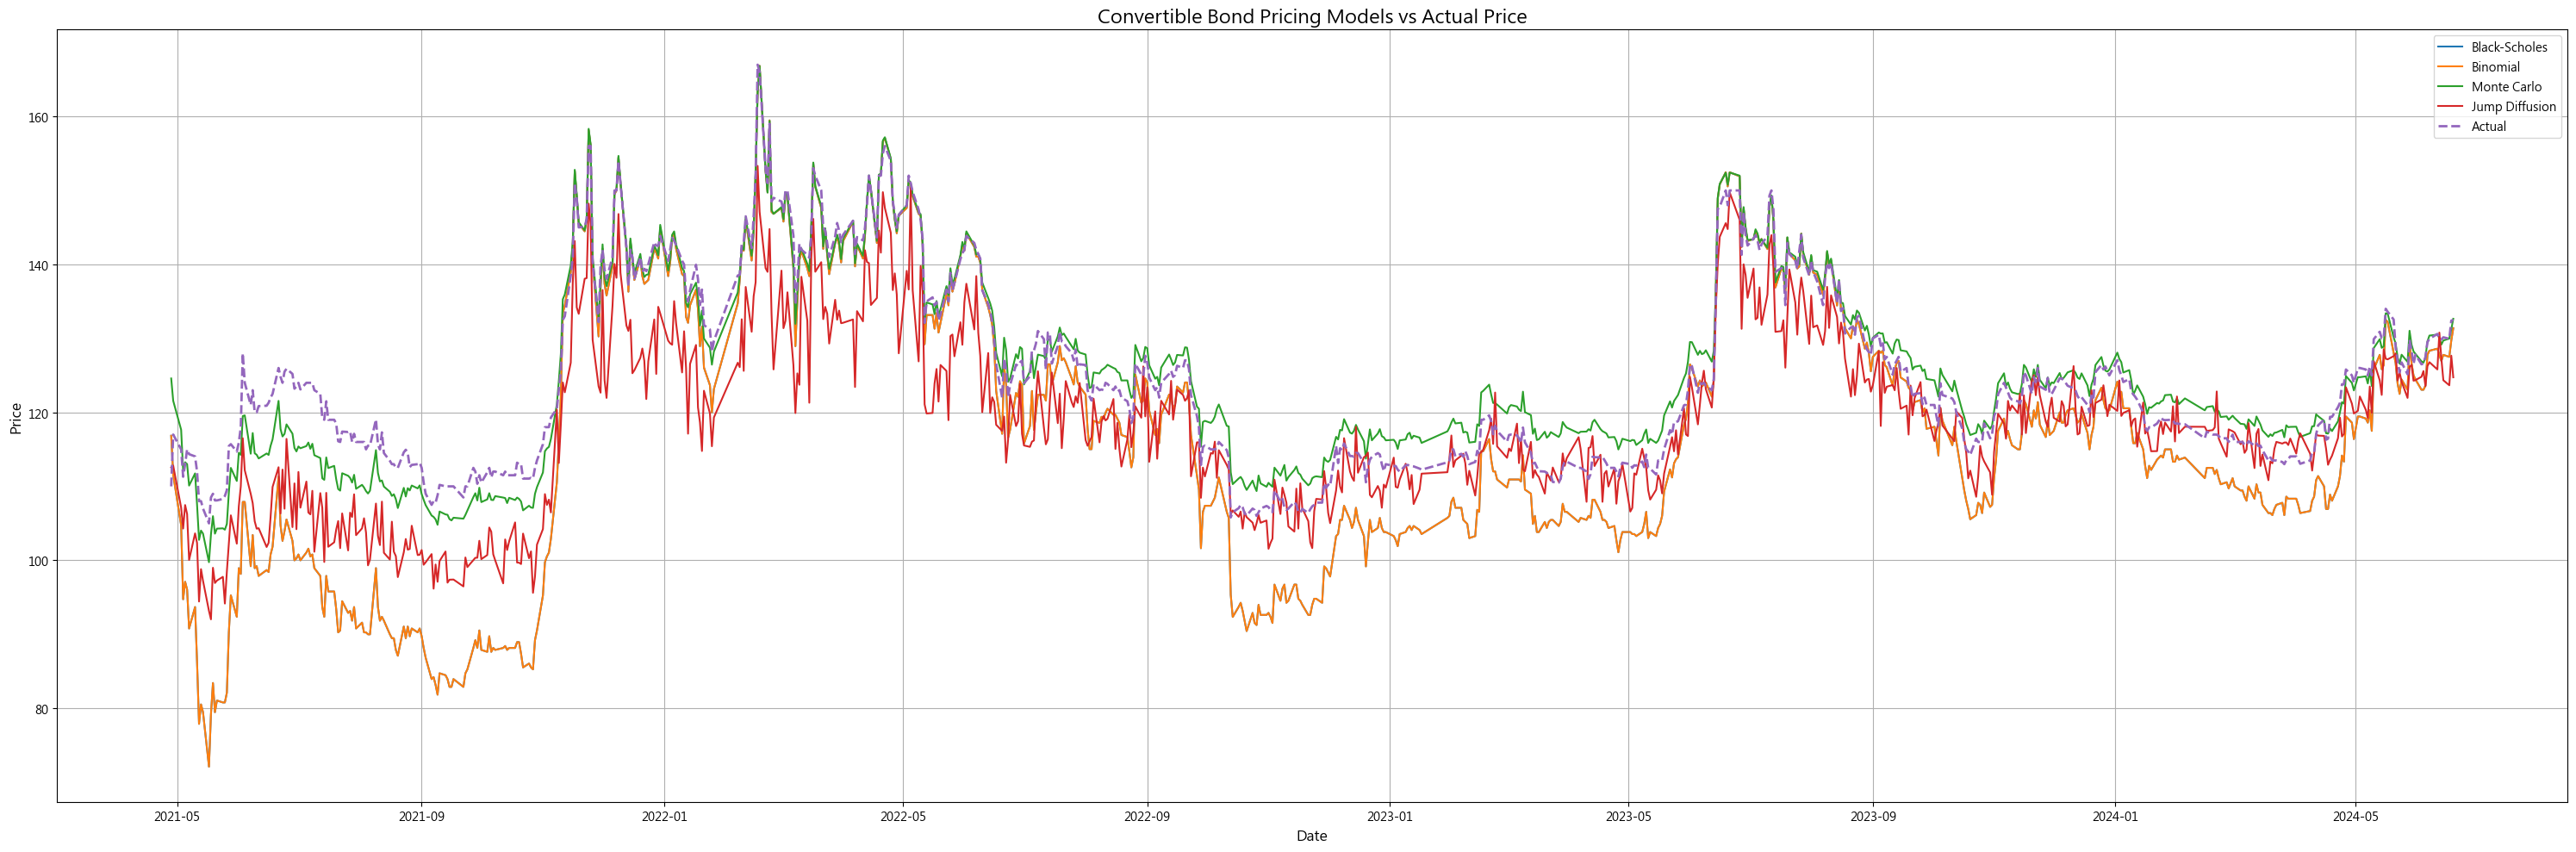

In [83]:
# Plotting
plt.figure(figsize=(30, 10))
plt.plot(model_prices.index, model_prices['BS'], label='Black-Scholes')
plt.plot(model_prices.index, model_prices['Binomial'], label='Binomial')
plt.plot(model_prices.index, model_prices['MonteCarlo'], label='Monte Carlo')
plt.plot(model_prices.index, model_prices['JumpDiffusion'], label='Jump Diffusion')
plt.plot(model_prices.index, model_prices['actual'], label='Actual', linestyle='--', linewidth=2)

plt.title('Convertible Bond Pricing Models vs Actual Price', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(loc='best', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

## historical volatilaty

In [17]:
df2 = df1.copy()
df2['volatility']  = df1['stock_price'].pct_change().rolling(22).std() * np.sqrt(252)
df2 = df2.iloc[22:, :]
df2

,cb_id,cb_name,transaction_type,close,change,open,max,min,no_of_transactions,unit,...,datetime,symbol,stock_price,轉換價格,到期日,days_to_maturity,conversion_price,remaining_years,cb_price,volatility
22,26107,華航七,等價,114.70,-1.00,115.8,115.80,114.55,69,328,...,2021-05-31,2610.0,17.55,19.0,2026-04-28,4.980556,19.0,4.980556,114.70,0.934805
23,26107,華航七,等價,115.90,1.20,114.7,116.25,114.30,126,661,...,2021-06-01,2610.0,18.80,19.0,2026-04-28,4.977778,19.0,4.977778,115.90,0.963339
24,26107,華航七,等價,117.95,2.05,116.3,118.50,116.30,235,1222,...,2021-06-02,2610.0,18.65,19.0,2026-04-28,4.975000,19.0,4.975000,117.95,0.941710
25,26107,華航七,等價,128.00,10.05,119.0,128.95,119.00,365,1912,...,2021-06-03,2610.0,20.50,19.0,2026-04-28,4.972222,19.0,4.972222,128.00,0.938447
26,26107,華航七,等價,124.00,-4.00,127.5,132.00,122.50,499,2292,...,2021-06-04,2610.0,20.50,19.0,2026-04-28,4.969444,19.0,4.969444,124.00,0.936697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,26107,華航七,等價,129.85,-0.15,129.4,130.10,128.60,16,19,...,2024-06-13,2610.0,22.85,18.0,2026-04-28,1.900000,18.0,1.900000,129.85,0.336307
763,26107,華航七,等價,130.15,0.30,130.9,130.90,129.50,17,31,...,2024-06-14,2610.0,23.00,18.0,2026-04-28,1.897222,18.0,1.897222,130.15,0.332606
764,26107,華航七,等價,129.95,-0.20,130.5,130.50,129.00,13,16,...,2024-06-17,2610.0,22.95,18.0,2026-04-28,1.888889,18.0,1.888889,129.95,0.332519
765,26107,華航七,等價,132.40,2.45,130.5,133.35,130.50,64,224,...,2024-06-18,2610.0,23.35,18.0,2026-04-28,1.886111,18.0,1.886111,132.40,0.293405


In [63]:
# 1. 建立策略實例
strategy2 = TaiwanCBStrategy()
    
# 2. 準備測試資料 (假設從CSV檔案讀取)
# CSV檔案需包含以下欄位：
# 年月, 轉換標的-收盤價, CB-收盤價, 轉換價格, 轉換價值 (1000), 
# CB-市值溢價%, 到期日, 是否擔保(Y/N)

    

    
# 4. 執行策略評估
model_results2 = strategy2.evaluate_pricing_models(df2)

In [65]:
# 7. 取得詳細的交易訊號
trading_opportunities2, model_prices2, trading_signals2 = model_results2

In [66]:
model_prices2['actual'] = df2['cb_price']
model_prices2['date'] = df2['datetime']
model_prices2['stock_price + 100'] = df2['stock_price'] + 100


model_prices2.set_index('date', inplace=True)
model_prices2

,BS,Binomial,MonteCarlo,JumpDiffusion,actual,stock_price + 100
date,,,,,,
2021-05-31,92.368421,92.368421,122.728916,105.504466,114.70,117.55
2021-06-01,98.947368,98.947368,124.696238,104.921920,115.90,118.80
2021-06-02,98.157895,98.157895,124.756239,125.906393,117.95,118.65
2021-06-03,107.894737,107.894737,129.764596,83.332973,128.00,120.50
2021-06-04,107.894737,107.894737,129.446849,131.525120,124.00,120.50
...,...,...,...,...,...,...
2024-06-13,126.944444,126.944444,129.694859,126.215206,129.85,122.85
2024-06-14,127.777778,127.777778,130.134361,130.718256,130.15,123.00
2024-06-17,127.500000,127.500000,130.044905,128.412207,129.95,122.95


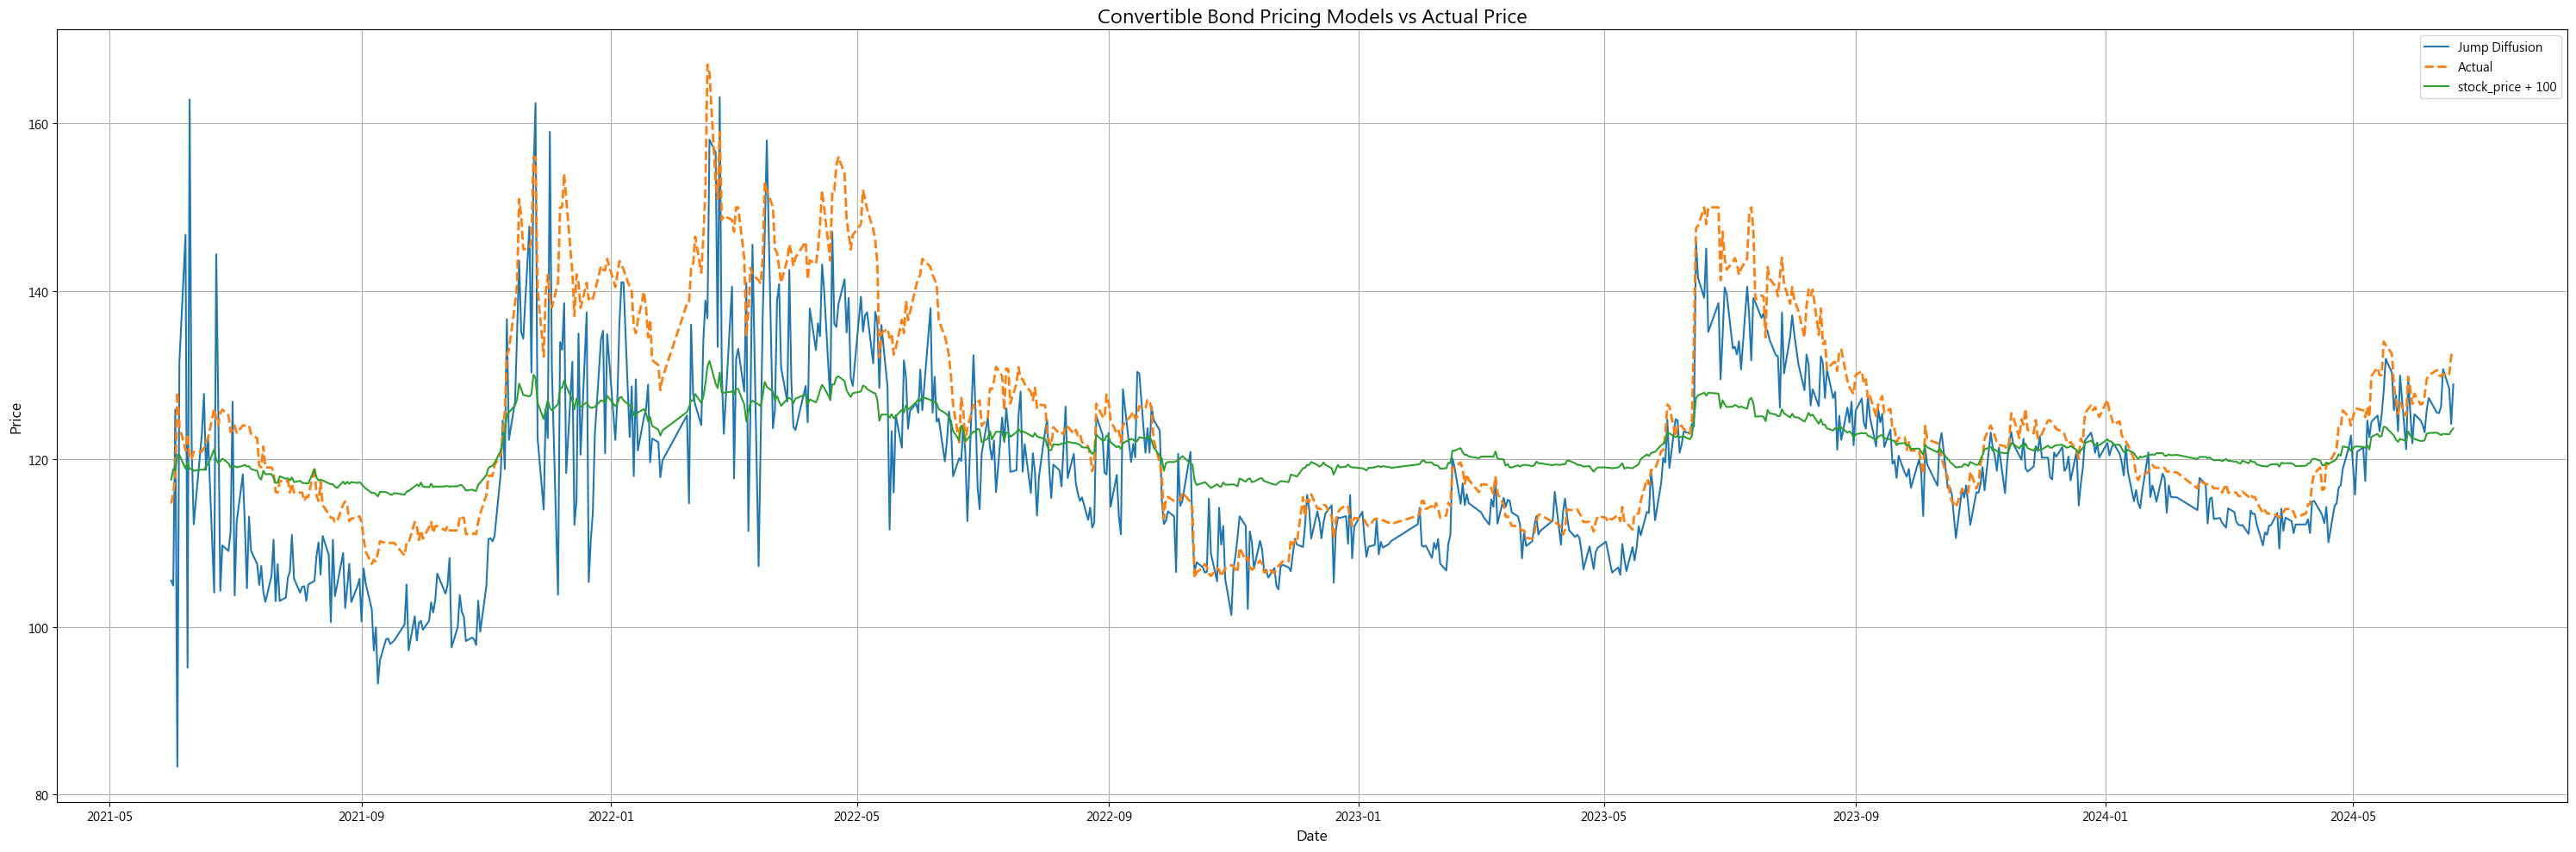

In [86]:
# Plotting
plt.figure(figsize=(30, 10))
#plt.plot(model_prices2.index, model_prices2['BS'], label='Black-Scholes')
#plt.plot(model_prices2.index, model_prices2['Binomial'], label='Binomial')
#plt.plot(model_prices2.index, model_prices2['MonteCarlo'], label='Monte Carlo')
plt.plot(model_prices2.index, model_prices2['JumpDiffusion'], label='Jump Diffusion')
plt.plot(model_prices2.index, model_prices2['actual'], label='Actual', linestyle='--', linewidth=2)
plt.plot(model_prices2.index, model_prices2['stock_price + 100'], label='stock_price + 100')

plt.title('Convertible Bond Pricing Models vs Actual Price', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(loc='best', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

## stocatistic volatility